# Asymmetrical bang-bang solution

  
## Reach of the target

Let $t$ be the time variable, $T$ the time (in $s$) when the target is pointed, $x(t)$ and $\dot{x}(t)$ respectively the position and the velocity at time $t$, $x_T$ the position to reach, $\rho \in \left [0 ,1\right]$.  
$x(t=0) = 0$ and $\dot{x}(t=0) = 0$  
  
$\newcommand{\intervalle}[2]{\left[#1\mathclose{}\mathpunct{};#2\right]}
\newcommand{\intervallefo}[2]{\left[#1\mathclose{}\mathpunct{};#2\right[}
\newcommand{\intervalleof}[2]{\left]#1\mathclose{}\mathpunct{};#2\right]}
\newcommand{\intervalleoo}[2]{\left]#1\mathclose{}\mathpunct{};#2\right[}$  
$\forall t \in \intervalle{0}{\rho\cdot T} : u(t) = U_+$  
$\forall t \in \intervalleof{\rho\cdot T}{T} : u(t) = U_-$  
$\forall t \in \intervalleoo{T}{+\infty} : u(t) = U_{\infty}$  
  
Formally, 
$$
u(t) = \mathbb 1_{\intervalle{0}{\rho\cdot T}} \cdot U_+ + \mathbb 1_{\intervalleof{\rho\cdot T}{T}} \cdot U_- + \mathbb 1_{\intervalleoo{T}{+\infty}} \cdot U_\infty
$$

where $\mathbb 1_{\mathcal{I}}$ is the [indicator function](https://en.wiktionary.org/wiki/indicator_function#English) of the interval $\mathcal{I}$
  
We will solve the following differential equation, which represents a linear model of the eye, on the previous intervals:  
  
$$
\dfrac{d\dot{x}(t)}{dt} = -\frac{1}{\tau}\cdot\dot{x}(t)+u(t)
$$

where $\tau$ is a constant of the eye, with $\left[\tau\right] = s$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
b = 1/0.013
m = 1
xT = 10
dt = 0.002
t_T = .05
t_R = .05
k = 0.0005
T = int(t_T/dt)
R = int(t_R/dt)
time = np.linspace(0, t_T+t_R, R+T+1)
time_ms = time*1000

On $\intervalle{0}{\rho\cdot T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{1}{\tau}\cdot\dot{x}(t)+U_+$  
  
We find:  $\dot{x}(t) = U_+\cdot\tau\left (1-e^{- \frac{t}{\tau}} \right )$ and so : $x(t) = U_+\cdot\tau\left [t-\tau\left(1-e^{- \frac{t}{\tau}} \right )\right]$

On $\intervalleof{\rho\cdot T}{T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{1}{\tau}\cdot\dot{x}(t)+U_-$  
  
We find:  $\dot{x}(t) = U_-\cdot\tau\left (1-e^{\frac{T-t}{\tau}} \right )$ and so : $x(t) = x_T - U_-\cdot\tau\left [T-t+\tau\left(1-e^{\frac{T-t}{\tau}} \right )\right]$
 

On $\intervalleoo{T}{+\infty}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{1}{\tau}\cdot\dot{x}(t)+U_{\infty}$  
  
We find:  $U_{\infty} = 0$ since $\forall t \in \intervalleoo{T}{+\infty}, \dot{x}(t) = 0$ (and $\ddot{x}(t) = 0$) and so : $x(t) = x_T$
 

Then, we use the continuity of the velocity at time $\rho\cdot T$ to find relations between $U_+$, $U_-$ and $\rho$.  
    
$U_+ = U_- \cdot \dfrac{1-e^{\frac{\left(1-\rho \right)T}{\tau}}}{1-e^{-\frac{\rho T}{\tau}}}$  
  
With the continuity of the position at time $\rho\cdot T$, we find relations between $U_-$ and $\rho$, and between $U_+$ and $\rho$.  

$U_- = \dfrac{1}{\tau} \cdot \dfrac{1-e^{-\frac{\rho T}{\tau}}}{T-\left (1-\rho\right)T e^{-\frac{\rho T}{\tau}}-\rho T e^{\frac{\left(1-\rho \right)T}{\tau}}} \cdot  x_T$

$U_+ = \dfrac{1}{\tau} \cdot \dfrac{1-e^{\frac{\left(1-\rho \right)T}{\tau}}}{T-\left (1-\rho\right)T e^{-\frac{\rho T}{\tau}}-\rho T e^{\frac{\left(1-\rho \right)T}{\tau}}} \cdot  x_T$

In [33]:
def fact(n): 
    """The factorial function
    Returns n!, that is n x (n-1) x (n-2) x ... x 1
    Recursive implementation
    """
    if n == 0:
        return 1
    else:
        return(n*fact(n-1))

In [34]:
# definition of A and B
beta = b
A = np.zeros((2,2))
B = np.zeros(2)
for i in np.arange(2):
    for j in np.arange(i,2):
        A[i,j] = dt**(j-i)/fact(j-i)
A[1, 1] = 1-dt*beta/m
B[1] = dt/m

In [35]:
def power(A, n): 
    """
    renvoie A puissance n où A est une matrice carrée
        
    """
    if n == 0:
        return(np.eye(int(np.sqrt(np.size(A)))))
    elif n == 1:
        return A
    else:
        if n % 2 == 0:
            A_half = power(A, n//2)
            return(A_half.dot(A_half))
        else:
            A_half = power(A, (n-1)//2)
            return(A.dot(A_half.dot(A_half)))

def A_pow(A):
    A_pow_array = np.zeros((T+R+1,2,2))

    for i in np.arange(T+R+1):
        A_pow_array[i] = power(A,i)
    return A_pow_array

A_pow_array = A_pow(A)

def pow_fast(n):
    return A_pow_array[n]

ci0_array = np.zeros(T+R+1)

for i in np.arange(T+R+1):
    ci0_array[i] = (pow_fast(i).dot(B))[0]

ci1_array = np.zeros(T+R+1)

for i in np.arange(T+R+1):
    ci1_array[i] = (pow_fast(i).dot(B))[1]
    
#ci2_array = np.zeros(T+R+1)

#for i in np.arange(T+R+1):
#    ci2_array[i] = (pow_fast(i).dot(B))[2]
    
#ci3_array = np.zeros(T+R+1)

#for i in np.arange(T+R+1):
#    ci3_array[i] = (pow_fast(i).dot(B))[3]

ci = np.array([ci0_array, ci1_array])

In [36]:
def expectation(u, t):
    """Computation of the expectation of the state vector at time t, given u
    """
    if t == 0:
        return np.array([0,0])
    else:
        return (ci[:,0:t]*np.flipud(u[0:t])).sum(axis = 1)

In [37]:
def variance(u, t):
    """Computation of the variance of the state vector at time t, given u
    """
    return (m**2)*k*(np.flipud(ci0_array[0:t]**2)*u[0:t]**2).sum()

In [38]:
n = 100 # number of rho's values

In [39]:
rho = np.linspace(0.5,0.999,n) # rho's tested values

In [40]:
Uplus = b*xT*(1-np.exp((1-rho)*b*T*dt/m))/(T*dt-(1-rho)*T*dt*np.exp(-rho*b*T*dt/m)-rho*T*dt*np.exp((1-rho)*b*T*dt/m))

In [41]:
Umoins = b*xT*(1-np.exp(-rho*b*T*dt/m))/(T*dt-(1-rho)*T*dt*np.exp(-rho*b*T*dt/m)-rho*T*dt*np.exp((1-rho)*b*T*dt/m))

In [42]:
u = np.zeros((n-1, T+R+1))

for i in np.arange(n-1):
    rhoT = np.round(T*rho[i])
    u[i,:] = np.concatenate((Uplus[i]*np.ones(rhoT),Umoins[i]*np.ones(T-rhoT),np.zeros(R+1)))

In [43]:
position = np.zeros((n-1, T+R+1))
velocity = np.zeros((n-1, T+R+1))

for i in np.arange(n-1):
    for j in np.arange(T+R+1):
        mean = expectation(u[i,:], j)
        position[i,j] = mean[0]
        velocity[i,j] = mean[1]

In [44]:
variancev = np.zeros((n-1, T+R+1))

for i in np.arange(n-1):
    for j in np.arange(T+R+1):
        variancev[i,j] = variance(u[i,:], j)

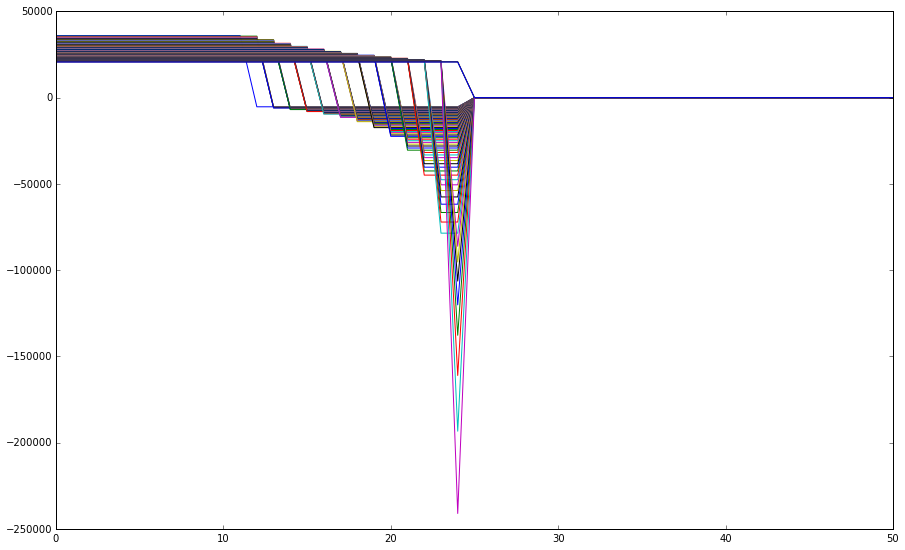

In [45]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
for i in np.arange(n-1):
    ax.plot(u[i,:])

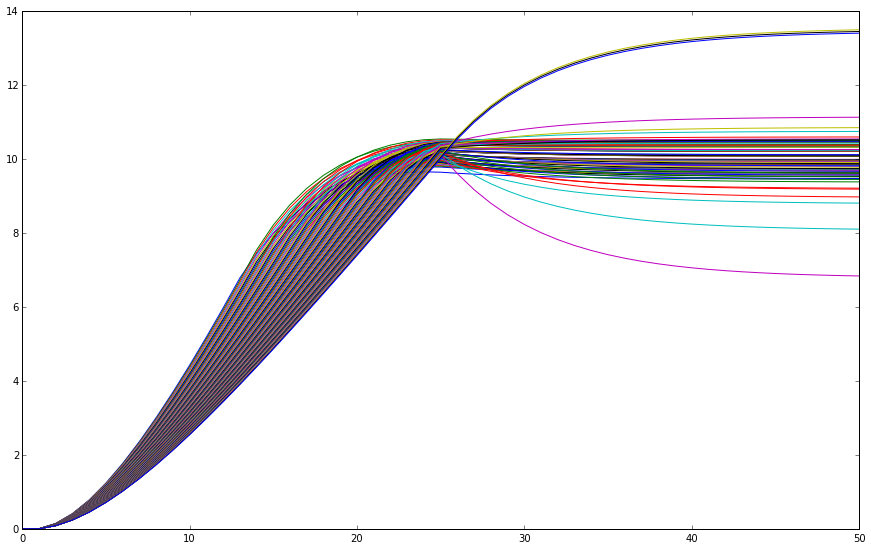

In [46]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
for i in np.arange(n-1):
    ax.plot(position[i,:])

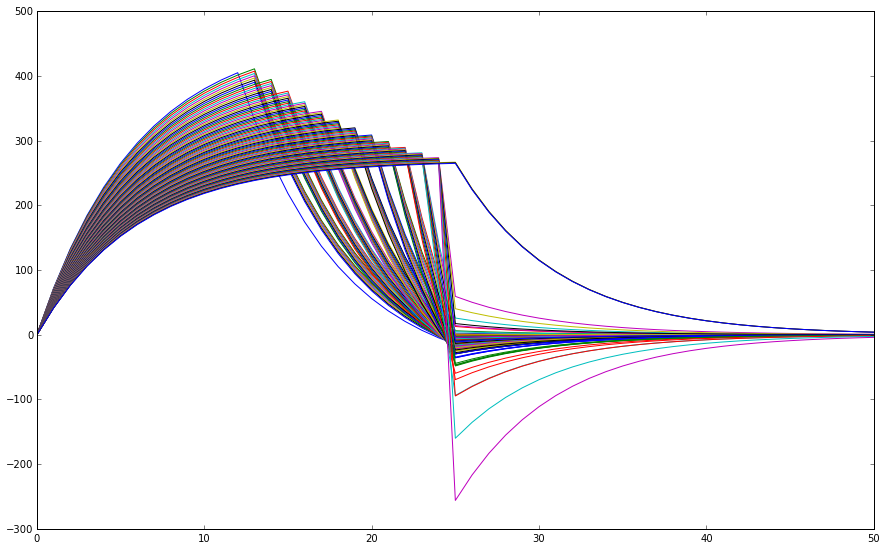

In [47]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
for i in np.arange(n-1):
    ax.plot(velocity[i,:])

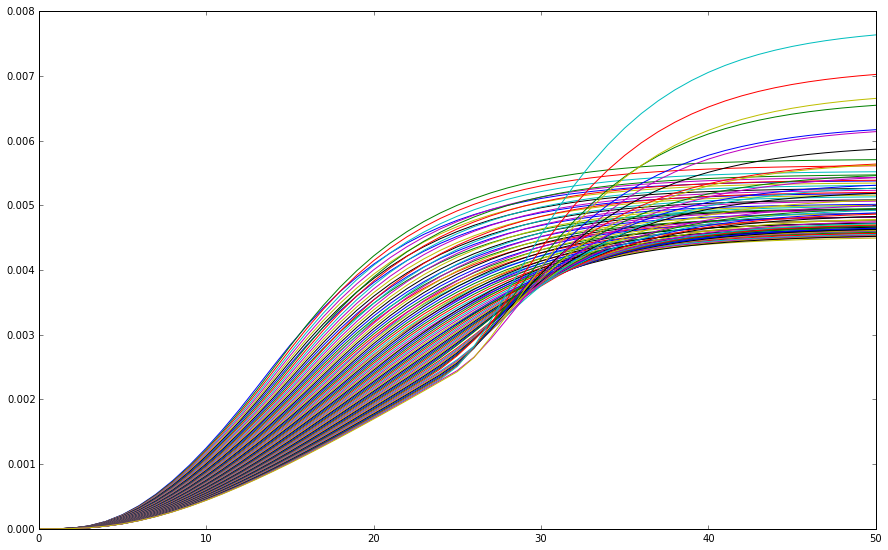

In [48]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
for i in np.arange(n-10):
    ax.plot(variancev[i,:])

In [49]:
somme = np.zeros(n-10)
for i in np.arange(n-10):
    for j in T+np.arange(R+1):
        somme[i] += variancev[i,j]

In [50]:
ind_best = np.argmin(somme)

In [51]:
rho[ind_best]

0.77722222222222226

In [52]:
u[ind_best,:]

array([ 24767.37275878,  24767.37275878,  24767.37275878,  24767.37275878,
        24767.37275878,  24767.37275878,  24767.37275878,  24767.37275878,
        24767.37275878,  24767.37275878,  24767.37275878,  24767.37275878,
        24767.37275878,  24767.37275878,  24767.37275878,  24767.37275878,
        24767.37275878,  24767.37275878,  24767.37275878, -17349.74263649,
       -17349.74263649, -17349.74263649, -17349.74263649, -17349.74263649,
       -17349.74263649,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ])

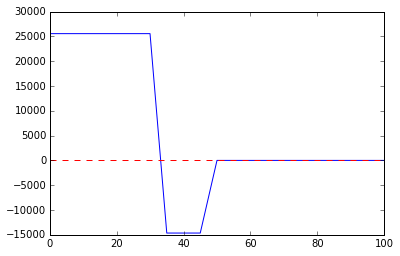

In [30]:
plt.plot(time_ms, u[ind_best,:])

plt.plot([0,(t_T+t_R)*1000],[0,0],'r--')

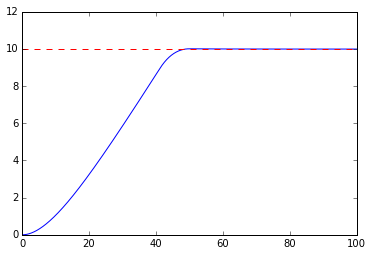

In [23]:
plt.plot(time_ms,position[ind_best,:])

plt.plot([0,(t_T+t_R)*1000],[xT,xT],'r--')

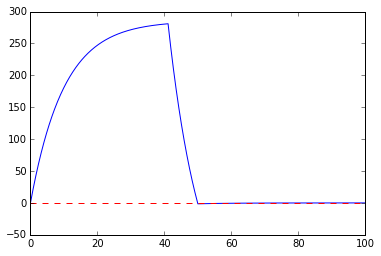

In [24]:
plt.plot(time_ms, velocity[ind_best,:])

plt.plot([0,(t_T+t_R)*1000],[0,0],'r--')

Conclusion : une solution assymétrique est plus efficace. Intuition pour l'expliquer?